In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=102)
import matplotlib.pyplot as plt
import decimal
from math import ceil
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties

# load data & plot in notebook 

In [2]:
%matplotlib inline
#%matplotlib qt
file = '/vol01/active_projects/anthony/fhd_p4_eeg_pheno_v4_beta.csv'
arr = np.loadtxt(open(file, 'rb'),delimiter=",")

# variables

In [3]:
freqs = ['Low theta', 'High theta', 'Low alpha', 'High alpha',
        'Low beta', 'Mid beta', 'High beta']
chans = ['FP1-F3', 'FP2-F4', 'FP1-F7', 'FP2-F8', 'F7-F3',
         'F8-F4', 'F7-T7', 'F8-T8', 'F3-C3', 'F4-C4', 'FZ-CZ',
         'CZ-PZ', 'T7-C3', 'T8-C4', 'T7-P7', 'T8-P8', 'C3-P3', 'C4-P4',
         'P7-P3', 'P8-P4', 'P7-O1', 'P8-O2', 'P3-O1', 'P4-O2', 'PZ-O1',
         'PZ-O2', 'O1-O2', 'CZ-C3', 'CZ-C4', 'PZ-P3', 'PZ-P4', 'F7-C3',
         'F8-C4', 'FP1-FP2', 'F3-FZ', 'FZ-F4']

# set up ages on x axis at intervals of .2 from 12-31 
xaxis = []
count = 11.8
for i in range(96):
    count += float(.2)
    xaxis.append(round(count,2))
    
xaxis_arr = np.array(xaxis)
len(xaxis)

96

# 4 dimensional array

In [4]:
na = arr.reshape(7,36,6,96)

# calculate y limits 

In [5]:
# use this function for arrays that aren't results of adding/subtracting arrays 
def get_minmax(na, freq_int):
    """get max & min values in an array for all channels for ONLY ONE frequency"""
    maxmin_lst = []
    for i in range(36):
        max_num = np.max(na[freq_int][i][2]) # change the 2 if you want 1 male mean, male, slope, etc.
        maxmin_lst.append(max_num)
        min_num = np.min(na[freq_int][i][2]) # change the 2 if you want 1 male mean, male, slope, etc.
        maxmin_lst.append(min_num)
    return maxmin_lst

def min_max_for_all(freq_lst, na):
    """get max/min for all frequencies -- channel combinations"""
    r = get_minmax(na, freq_lst[0])
    s = get_minmax(na, freq_lst[1])
    t = get_minmax(na, freq_lst[2])
    u = get_minmax(na, freq_lst[3])
    v = get_minmax(na, freq_lst[4])
    w = get_minmax(na, freq_lst[5])
    x = get_minmax(na, freq_lst[6])

    # 36 channels * 7 frequencies * 2 min/max = 504 nums
    all_chan_freq_combos = r + s + t + u + v + w + x 

    return 'max {} min {}'.format(round(float(max(all_chan_freq_combos)), 3), round(float(min(all_chan_freq_combos)), 3))

In [6]:
freq_lst = [0,1,2,3,4,5,6]
min_max_for_all(freq_lst, na)

'max 0.067 min -0.034'

# plot from array

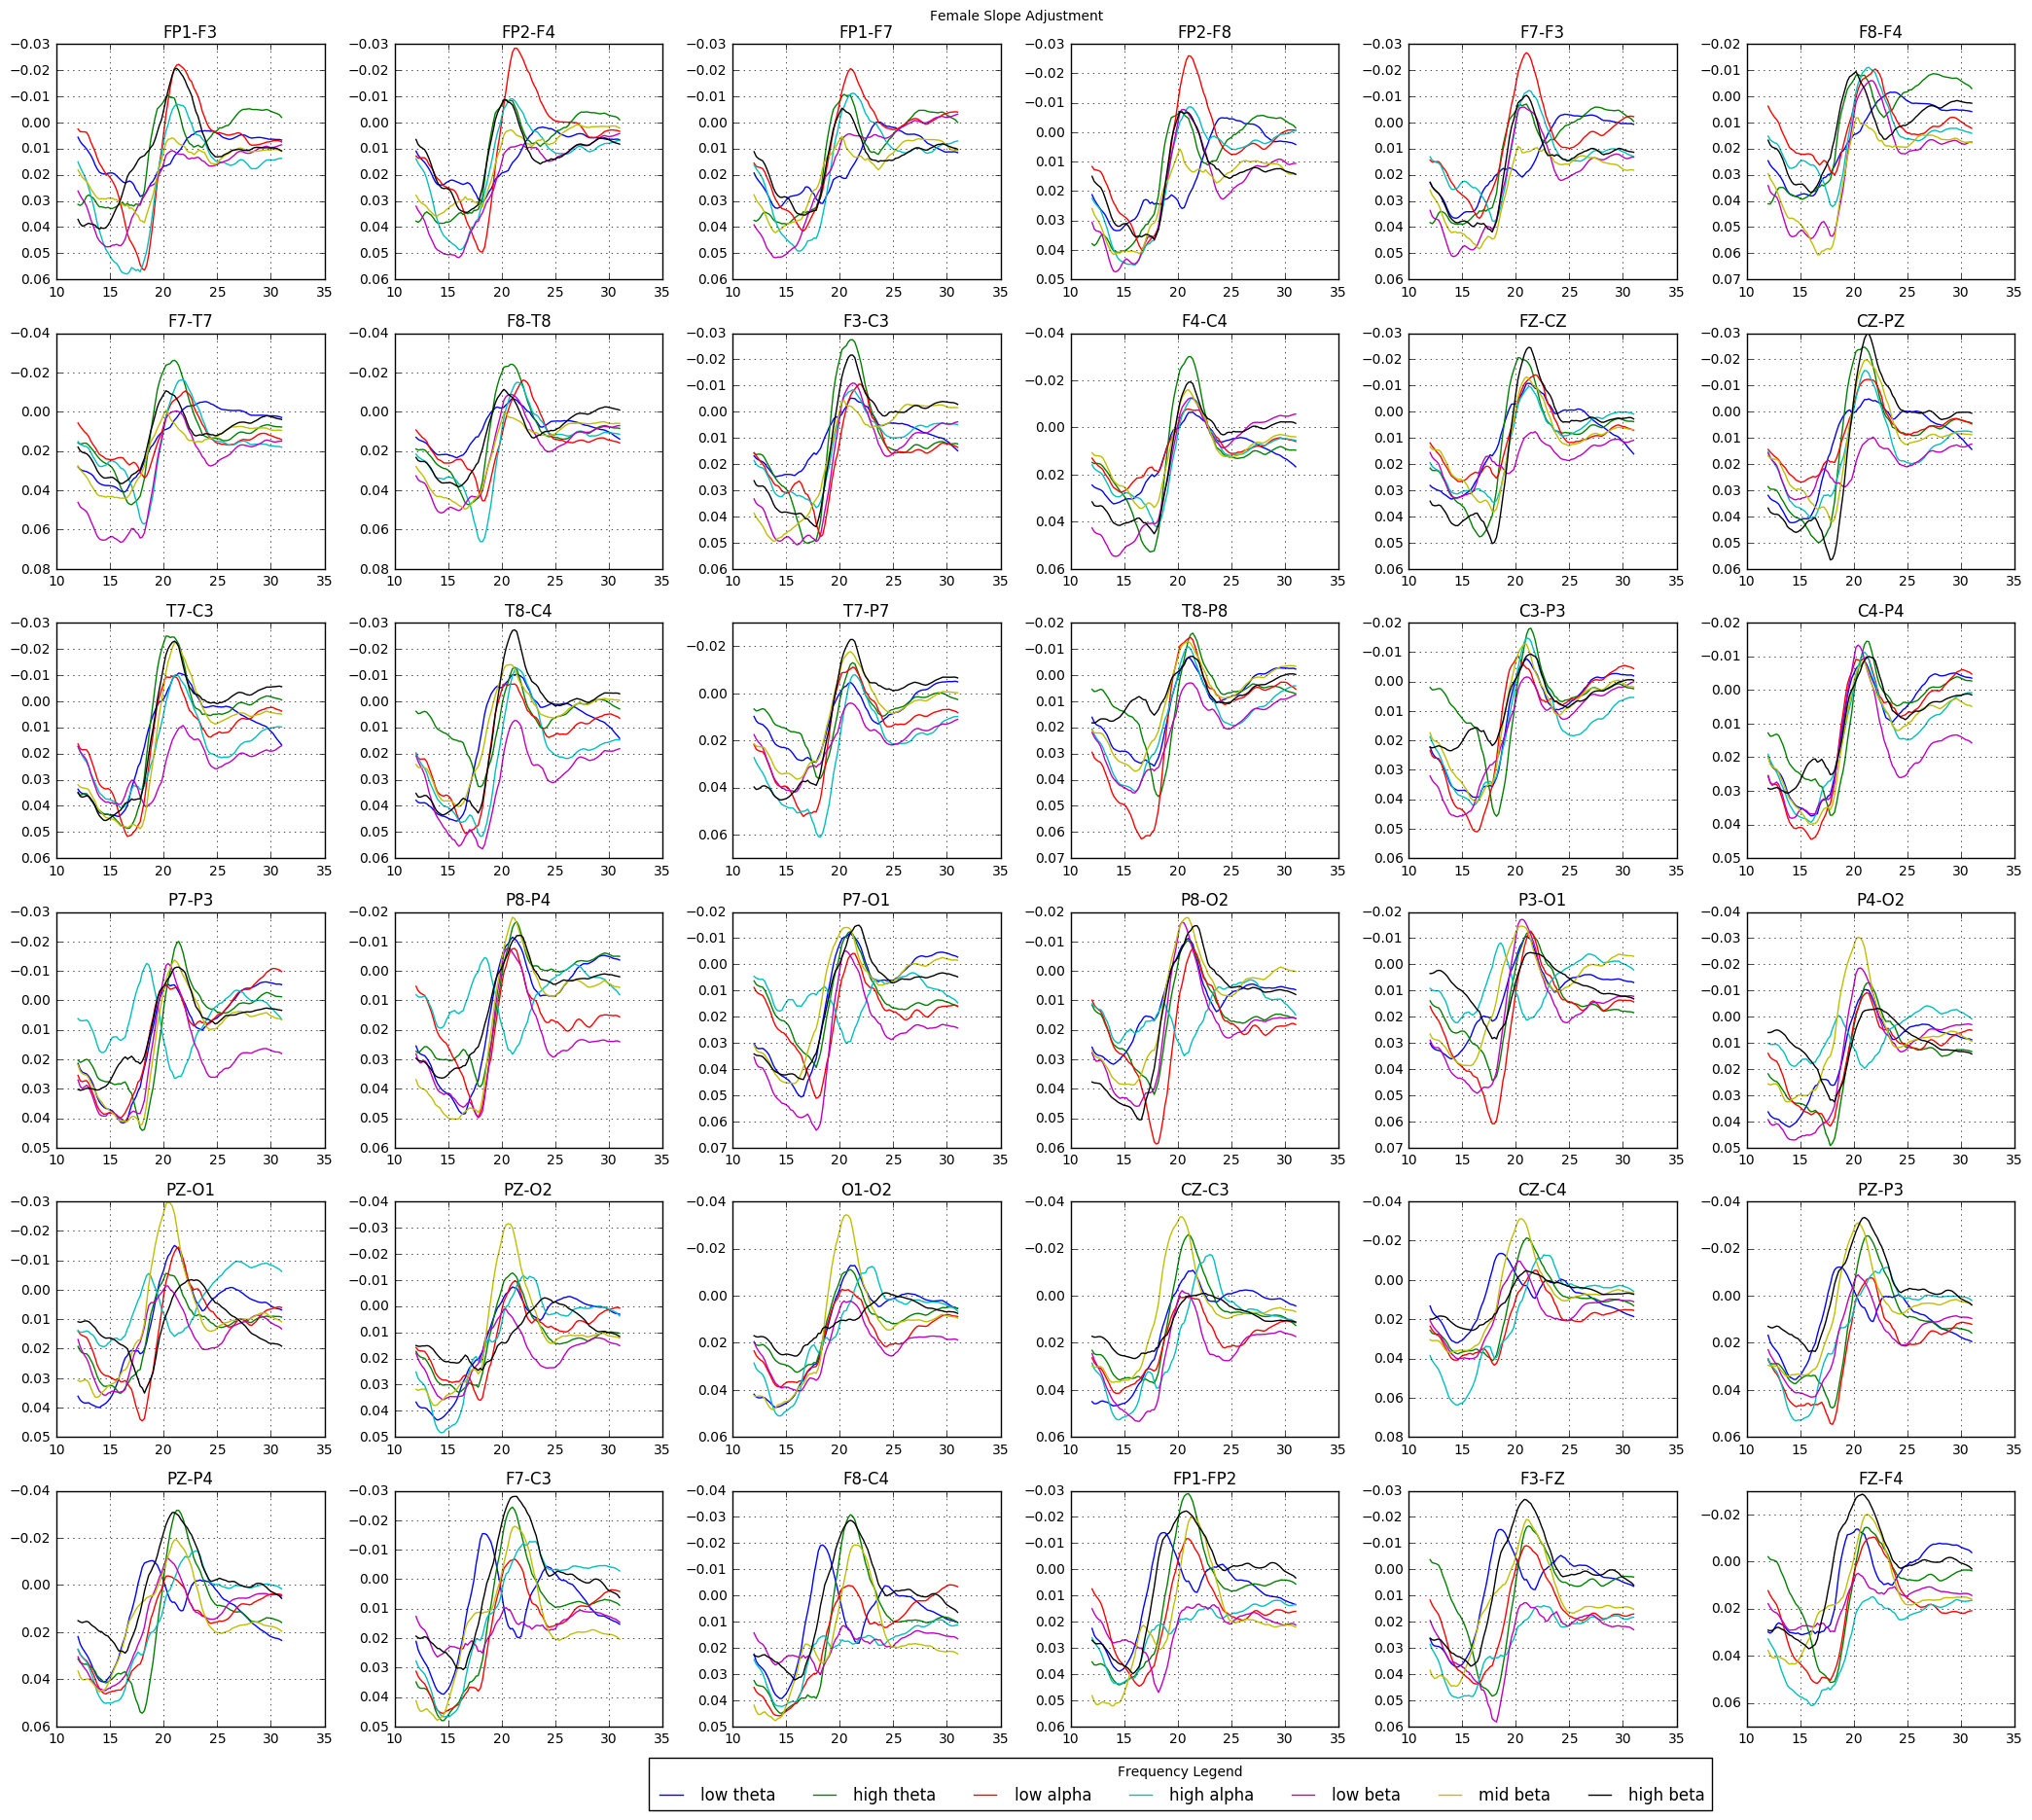

In [7]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(21,18)) #figsize=(18,15)


with PdfPages('female_slope_adjustment.pdf') as pdf:
    for idx, ax in enumerate(axes.flatten()):

        #ax.set_xlim(11.5,31.5)
        #ax.set_ylim(0.067, -0.034)
        
        ax.grid()
        ax.plot(xaxis_arr, na[0][idx][2], label='low theta') #ax.plot(xaxis_arr, na[0][idx][4], label='low theta')
        ax.plot(xaxis_arr, na[1][idx][2], label='high theta')
        ax.plot(xaxis_arr, na[2][idx][2], label='low alpha')
        ax.plot(xaxis_arr, na[3][idx][2], label='high alpha')
        ax.plot(xaxis_arr, na[4][idx][2], label='low beta')
        ax.plot(xaxis_arr, na[5][idx][2], label='mid beta')
        ax.plot(xaxis_arr, na[6][idx][2], label='high beta')
        
        ax.invert_yaxis()  # invert works
        fig.tight_layout() # automatically adjusts spacing b/t plots 
        
        
        #fig.subplots_adjust(hspace=.5)  # horozontial spacing b/t plots 
        #fig.subplots_adjust(wspace=.5)  # vertical spacing b/t plots 
        #ax.set_position([0.1,0.1,0.5,0.8])
        #ax.get_position()
        #plt.gcf().get_axes()[idx].set_xlim(11.5,31.5)
        #plt.gcf().get_axes()[idx].set_ylim(0.08, -0.04)
        
        

        fig.suptitle('Female Slope Adjustment', y=1)


        ax.title.set_text(chans[idx])

    handles, labels = ax.get_legend_handles_labels()
    #lgd = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(1.04, 0))
    #lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
    lgd = ax.legend(handles, labels, loc=0, bbox_to_anchor=(-0.0999,-0.0999), ncol=7, title='Frequency Legend')
    #lgd = ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    pdf.savefig(bbox_inches='tight')

# plot by subtracting/adding different arrays from each other

In [8]:
# subtract each channel/frequency from each other & append resulting array to list 
def subtract_arrays(arr, first_arr, sec_arr):
    
    lst_of_arrs = []
    for i in range(36):
        lst_of_arrs.append(arr[0][i][first_arr] - arr[0][i][sec_arr])
        lst_of_arrs.append(arr[1][i][first_arr] - arr[1][i][sec_arr])
        lst_of_arrs.append(arr[2][i][first_arr] - arr[2][i][sec_arr])
        lst_of_arrs.append(arr[3][i][first_arr] - arr[3][i][sec_arr])
        lst_of_arrs.append(arr[4][i][first_arr] - arr[4][i][sec_arr])
        lst_of_arrs.append(arr[5][i][first_arr] - arr[5][i][sec_arr])
        lst_of_arrs.append(arr[6][i][first_arr] - arr[6][i][sec_arr])



    # removes the list wrapping the array
    new_arr = np.vstack(lst_of_arrs)
    # reshape again 
    return new_arr.reshape(7, 36, 96)

# use this function for arrays that are the result of addition/subtraction
def get_minmax_operations(na):
    
    maxmin_lst = []
    for i in range(36):
        
        maxmin_lst.append(np.max(na[0][i]))
        maxmin_lst.append(np.min(na[0][i]))

        maxmin_lst.append(np.max(na[1][i]))
        maxmin_lst.append(np.min(na[1][i]))
                          
        maxmin_lst.append(np.max(na[2][i]))
        maxmin_lst.append(np.min(na[2][i]))
                          
        maxmin_lst.append(np.max(na[3][i]))
        maxmin_lst.append(np.min(na[3][i]))
                          
        maxmin_lst.append(np.max(na[4][i]))
        maxmin_lst.append(np.min(na[4][i]))
                          
        maxmin_lst.append(np.max(na[5][i]))
        maxmin_lst.append(np.min(na[5][i]))
                          
        maxmin_lst.append(np.max(na[6][i]))
        maxmin_lst.append(np.min(na[6][i]))
                                               
    return '{},{}'.format(round(float(max(maxmin_lst)), 3), round(float(min(maxmin_lst)), 3))

# use this to subtract arrays from each other

In [9]:
newnewarr = subtract_arrays(na, 2,1) # 1/2, 3/1, 3/4

# use this to get max/min value in subtracted arrays

In [10]:
get_minmax_operations(newnewarr)

'0.173,-0.046'

# array now has 3 dimensions

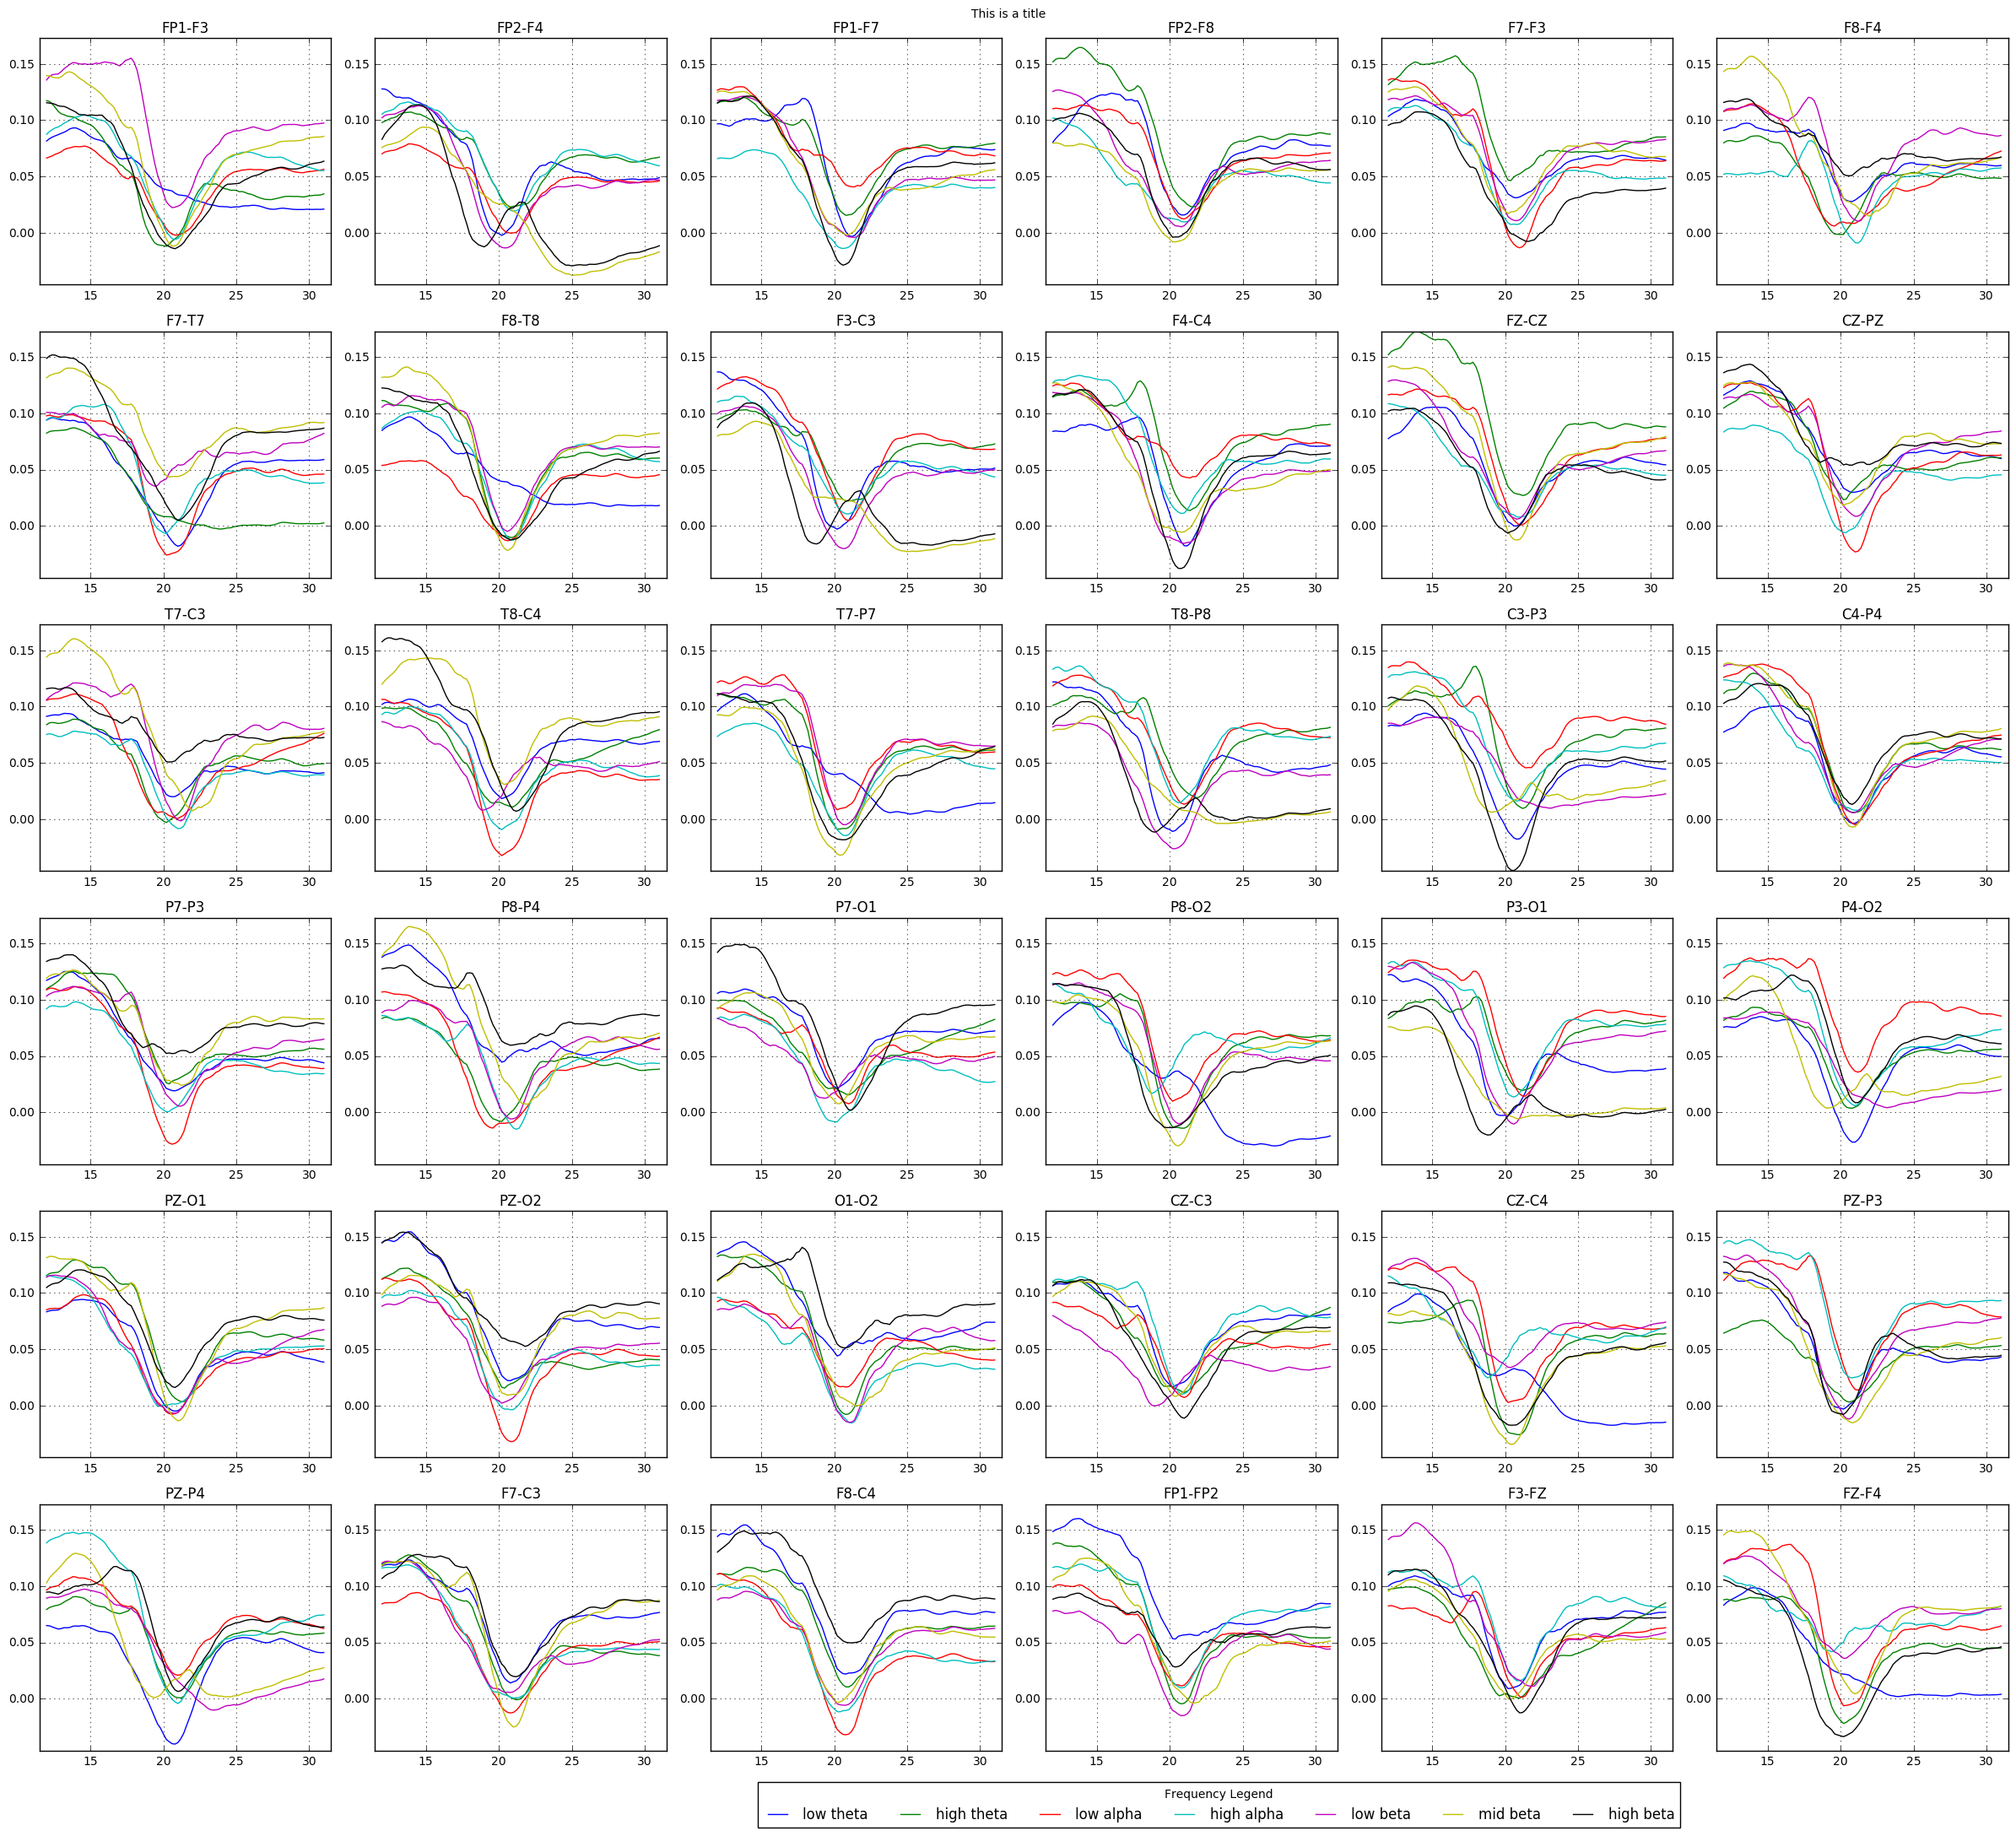

In [11]:
# plot 
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(24,21)) #24/11

with PdfPages('test.pdf') as pdf:
    for idx, ax in enumerate(axes.flatten()):

        fig.suptitle('This is a title', y=1)
        ax.grid()

        ax.set_xlim(11.5,31.5)
        ax.set_ylim(0.173,-0.046)

        ax.plot(xaxis_arr, newnewarr[0][idx], label='low theta') #ax.plot(xaxis_arr, na[0][idx][4], label='low theta')
        ax.plot(xaxis_arr, newnewarr[1][idx], label='high theta')
        ax.plot(xaxis_arr, newnewarr[2][idx], label='low alpha')
        ax.plot(xaxis_arr, newnewarr[3][idx], label='high alpha')
        ax.plot(xaxis_arr, newnewarr[4][idx], label='low beta')
        ax.plot(xaxis_arr, newnewarr[5][idx], label='mid beta')
        ax.plot(xaxis_arr, newnewarr[6][idx], label='high beta')
        ax.invert_yaxis()  # invert works

        ax.title.set_text(chans[idx])
        fig.tight_layout()

    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc=0, bbox_to_anchor=(-0.0999,-0.0999), ncol=7, title='Frequency Legend')
    pdf.savefig(bbox_inches='tight')